In [31]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import requests

from os import listdir
import unicodedata

from paths import *
from scripts.manipulation import remove_acentos
from scripts.manipulation import normalize_cols
from scripts import scrap_data
from scripts import manipulation

from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

import yaml


# LOAD and SAVE DATA

In [34]:
new_data, df_final = scrap_data.load_data()

In [35]:
new_data.sort_values(by='Confirmed', ascending=False).reset_index(drop=True).head(17)

,Date_last_updated_AEDT,date,countryname,Confirmed,Deaths,Recovered
0,4/13/2020 03:15,2020-04-13,0,1853604,114270,427801
1,4/13/2020 03:15,2020-04-13,World,1853604,114270,427801
2,4/13/2020 03:15,2020-04-13,US,560433,22115,32634
3,4/13/2020 03:15,2020-04-13,Spain,166831,17209,62391
4,4/13/2020 03:15,2020-04-13,Italy,156363,19899,34211
5,4/13/2020 03:15,2020-04-13,France,132591,14393,27186
6,4/13/2020 03:15,2020-04-13,Germany,127854,3022,64300
7,4/13/2020 03:15,2020-04-13,UK,84279,10612,0
8,4/13/2020 03:15,2020-04-13,China,82160,3341,77663
9,4/13/2020 03:15,2020-04-13,Iran,71686,4474,43894


In [36]:
from scripts import io

In [37]:
df = io.load_total_table()


## TOTAL

In [39]:
df = manipulation.create_all_country_total_data(df)


In [40]:
mask_countrys =((df['countrycode']=='BR') | (df['countrycode']=='IT') | (df['countrycode']=='ES') | (df['countrycode']=='US') | 
                (df['countrycode']=='CN') | (df['countrycode']=='KR') | 
                (df['countrycode']=='IR') | (df['countrycode']=='DE') | (df['countrycode']=='FR') | (df['countrycode']=='FR')
               )

In [41]:
from scripts.vis_graphs import total_casos
themes = yaml.load(open('../themes/custom_colorscales.yaml', 'r'), Loader=yaml.FullLoader)

fig = total_casos(df,mask_countrys, escala='log',var='cases',date=today, save=True, themes=themes['all_world'])

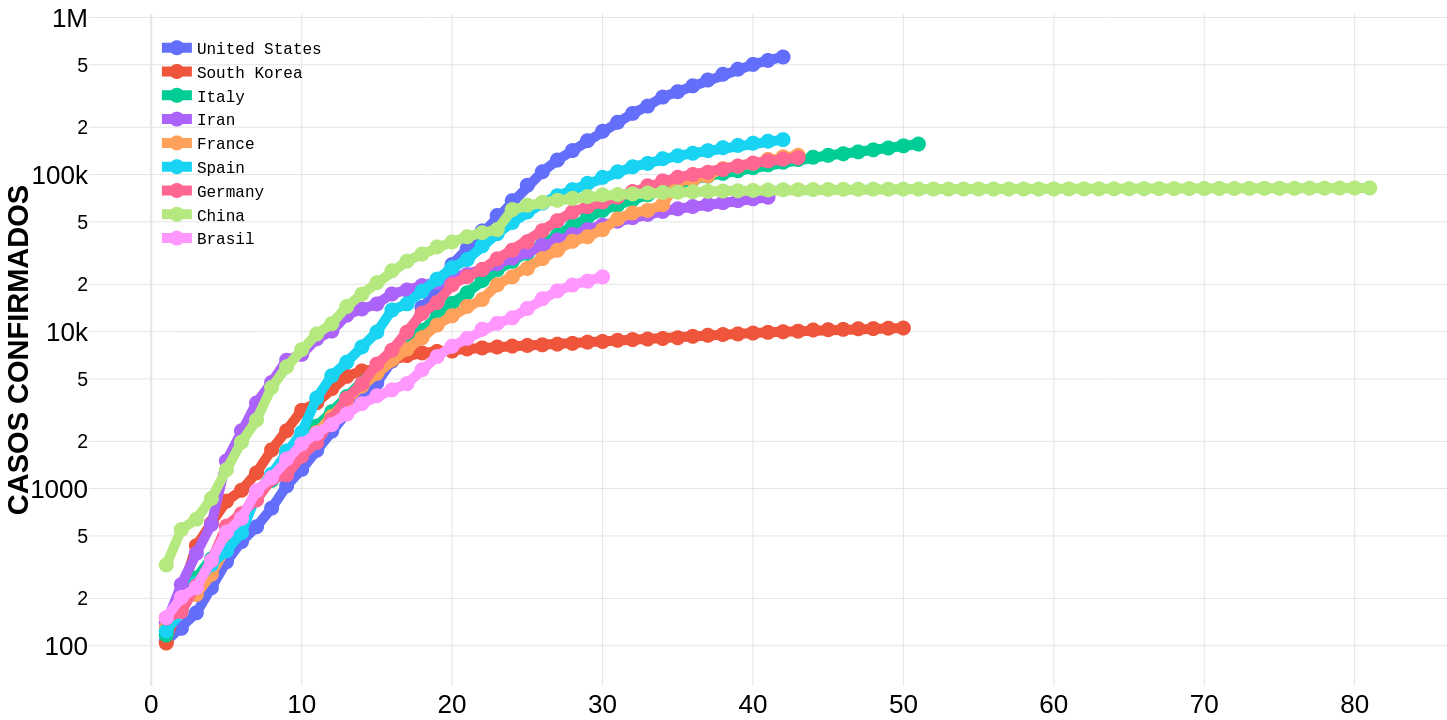

In [42]:
fig

In [43]:
for scale in ['lin','log']:
    for var in ['deaths','cases']:
        fig = total_casos(df,mask_countrys, escala=scale,var=var,date=today, save=True,themes=themes['all_world'])

## By Country

In [ ]:
df = manipulation.create_single_country_data(df)

In [21]:
from scripts.vis_graphs import total_by_country
# themes = yaml.load(open('../themes/custom_colorscales.yaml', 'r'), Loader=yaml.FullLoader)

fig = total_by_country(df,geoid='BR', escala='lin',var='cases', save=False, data=today,themes=themes['by_country'])

In [23]:
themes = yaml.load(open('../themes/custom_colorscales.yaml', 'r'), Loader=yaml.FullLoader)

for geo in ['IT','CN','US','UK','DE','ES','FR','BR']:
    for scale in ['lin','log']:
        for var in ['deaths','cases']:
                fig = total_by_country(df,geoid=geo, escala=scale,var=var, save=True,themes=themes['by_country'])

## Bar Comparison

In [24]:
from scripts import manipulation

In [26]:
df = manipulation.create_bar_compare_data(df)

# mask = df['new_cases']!=0
# df = df[mask]
# df['count'] = 1

# since_first_day = df[['count','countrycode']].groupby(by = ['countrycode',]).cumsum()['count'].tolist()
# df['since_first_day'] = since_first_day

In [27]:
from scripts.vis_graphs import bar_compare
themes = yaml.load(open('../themes/custom_colorscales.yaml', 'r'), Loader=yaml.FullLoader)

paises = {"IT":"Itália","ES":"Espanha","US":"Estados Unidos"}

for country in paises.keys():
    
    br_it, pais, pais_name, pais_comp, pais_comp_name =  manipulation.manipule_bar_compare_data(df,country,paises)
    
    # mask = br_it['since_first_day']< 10 + 21
    # br_it = br_it[mask]

    fig = bar_compare(br_it, pais, pais_name, pais_comp, pais_comp_name, col='deaths', save=True, themes = themes['bar_comparison'])

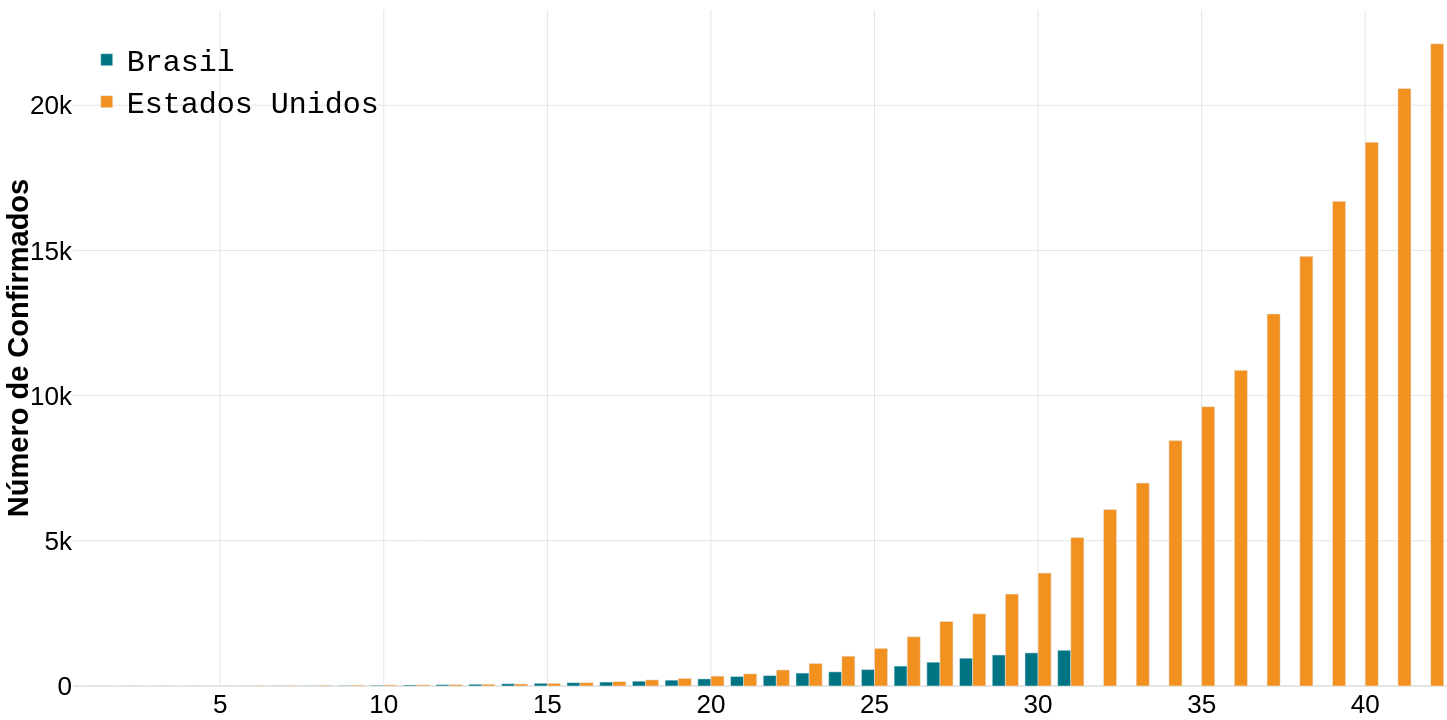

In [28]:
fig

### Figures to UP

In [35]:
# from scripts import io

# f1_name = 'total_lin.html'
# f2_name = 'mortes_lin.html'
# f3_name = 'brasil_lin_total.html'
# f4_name = 'brasil_lin_mortes.html'
# # f5_name = "brasil_por_estado_confirmed.html"
# # f6_name = "brasil_por_estado_deaths.html"

# f1_path = f"../images/multipleCountry/{f1_name}"
# f2_path = f"../images/multipleCountry/{f2_name}"
# f3_path = f"../images/singleCountry/{f3_name}"
# f4_path = f"../images/singleCountry/{f4_name}"
# # f5_path = f"../images/brasil/{f5_name}"
# # f6_path = f"../images/brasil/{f6_name}"

# names_paths = {f1_name:f1_path,
#          f2_name:f2_path,
#          f3_name:f3_path,
#          f4_name:f4_path
#               }
# #          f5_name:f5_path,
# #          f6_name:f6_path}

# for name in names_paths.keys():
    
#     io.to_storage(bucket='sv-covid19',
#               bucket_folder='brasil',
#               file_name=name,
#               path_to_file=names_paths[name])